
     ANO  HECTARES AFETADOS  PRECIPITACAO
0   2012       19798.436642       6471422
1   2013       34045.818673       6535087
2   2014       65085.899377       4862968
3   2015       25076.738385       7483063
4   2016       53289.713639       6593499
5   2017       66355.134667       5738420
6   2018       54706.495804       5064771
7   2019       40249.554878       5132659
8   2020       75778.209611       5120263
9   2021       68559.276986       4837528
10  2022       17171.426043       6155146

matriz de covariância:
[[ 5.08768506e-05 -1.49705171e-03]
 [-1.49705171e-03  9.02268774e-02]]

autovalores: [2.60304784e-05 9.02517238e-02]
autovetores: [[-0.9998623   0.01659458]
 [-0.01659458 -0.9998623 ]]
pca0: [ 0.22199945  0.24352469 -0.3241041   0.56528242  0.26323913 -0.02701594
 -0.25556133 -0.23244129 -0.23684813 -0.33275704  0.11468213]

pca1: [ 0.00564541  0.0004518  -0.00066407 -0.00184376 -0.00640784 -0.00602565
  0.00172168  0.00624545 -0.00574181 -0.00169951  0.00831829]

m:

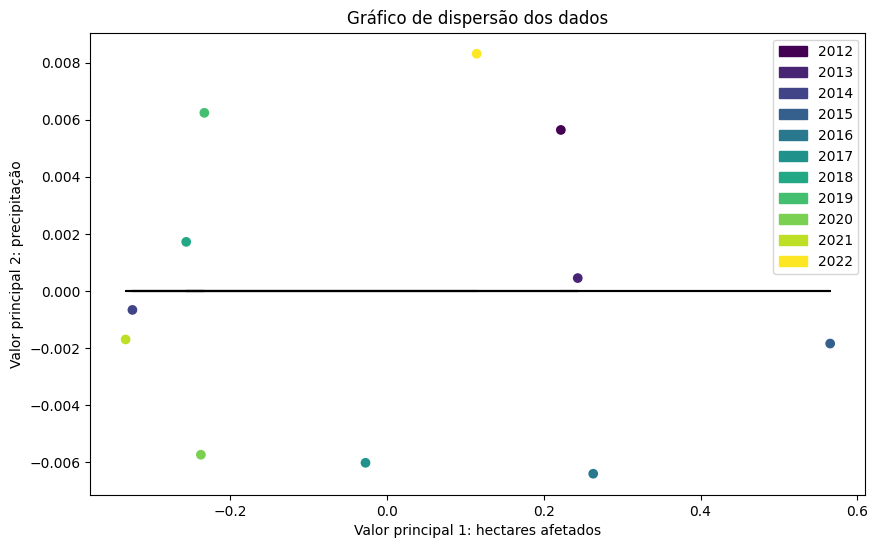

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Pegar dataset
novo = pd.read_excel('PCA PRECIPITACAO E QUEIMA FLORESTAL.xlsx', usecols=["ANO", 'HECTARES AFETADOS', 'PRECIPITACAO'])

print(f"\n{novo}\n")


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ex = novo.iloc[:, 1:].values
ey = novo.iloc[:, 0].values



# Covariancia e autovalores e autovetores
nex = imputer.fit_transform(ex)

nex = (nex - np.mean(nex))/np.std(nex)

covM = np.cov(nex.T)
print(f"matriz de covariância:\n{covM}\n")

eigVal, eigVec = np.linalg.eig(covM)
print(f"autovalores: {eigVal}")
print(f"autovetores: {eigVec}")



# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(nex)

xlinha = np.array(X_pca[:,0])
ylinha = np.array(X_pca[:,1])


print(f"pca0: {xlinha}\n")
print(f"pca1: {ylinha}\n")



# Plot
plt.figure(figsize=(10, 6))
plt.plot()

m, b = np.polyfit(xlinha, ylinha, 1)

print(f"m: {m}")
print(f"b: {b}")


label_map = {nome:i for i, nome in enumerate(np.unique(ey))}

y_numeric = np.array([label_map[nome] for nome in ey])

scatter = plt.scatter(xlinha, ylinha, c=y_numeric, cmap='viridis')
handles = [Patch(color=scatter.cmap(scatter.norm(label_map[nome])), label=nome) for nome in label_map]


plt.legend(handles=handles)
plt.xlabel('Valor principal 1: hectares afetados')
plt.ylabel('Valor principal 2: precipitação')

plt.title('Gráfico de dispersão dos dados')

plt.plot(xlinha, m*xlinha+b, "k")

plt.show()
